In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import os
print(os.listdir("../input"))

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sbn
import sklearn.metrics
from sklearn.model_selection import train_test_split
%matplotlib inline


['kiva_loans.csv', 'loan_themes_by_region.csv', 'kiva_mpi_region_locations.csv', 'loan_theme_ids.csv']


In [40]:
kiva_infoA  = pd.read_csv("../input/kiva_loans.csv")
kiva_infoB = pd.read_csv("../input/kiva_mpi_region_locations.csv")
kiva_infoC = pd.read_csv("../input/loan_theme_ids.csv")
kiva_infoD = pd.read_csv("../input/loan_themes_by_region.csv")


In [41]:
kiva_infoA.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [42]:
kiva_infoC.columns

Index(['id', 'Loan Theme ID', 'Loan Theme Type', 'Partner ID'], dtype='object')

# Concatenating tables with common elements

## First concatenation

In [43]:
kiva_infoAC = pd.merge(left = kiva_infoA,
                       right = kiva_infoC,
                       how = "inner",
                       on = "id")

*where variable types are as follows:*

In [44]:
kiva_infoAC.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
Loan Theme ID          object
Loan Theme Type        object
Partner ID            float64
dtype: object

### **and separating loans by country and unique sectors of investment**

In [45]:
kiva_agric = kiva_infoAC[kiva_infoAC["sector"] == "Agriculture"]
agric_count=kiva_agric.activity.value_counts()
agric_vals =pd.unique(kiva_agric.activity.values)

Text(0,0.5,'Number of loans')

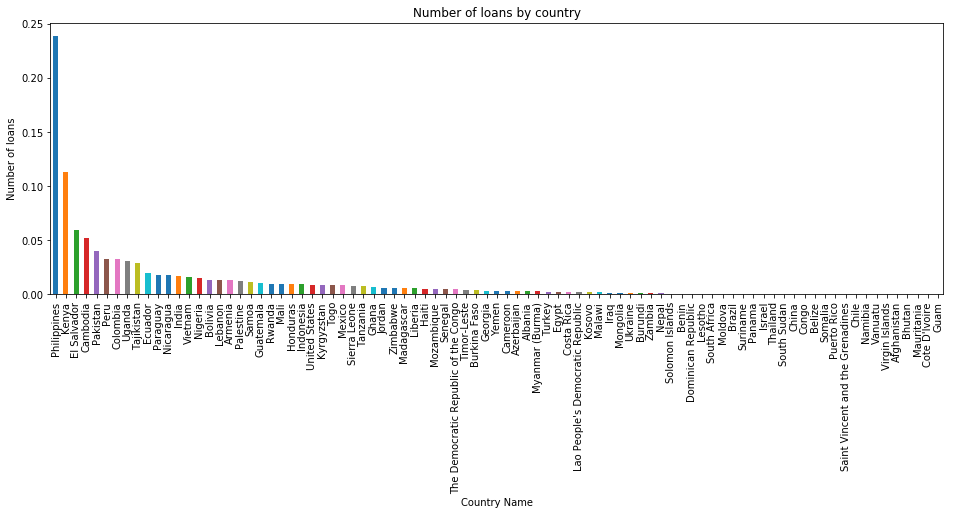

In [46]:
loanSectPerc = kiva_infoAC["sector"].value_counts()/sum(kiva_infoAC["sector"].value_counts())
loanCountryPerc = kiva_infoA.country.value_counts()/sum(kiva_infoA.country.value_counts())
country_funded = kiva_infoA.groupby(['country']).funded_amount.sum()
country_funded/= sum(country_funded)

fig1, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,11))

plt.subplot(2,1,1)
loanCountryPerc.plot.bar()
plt.title("Number of loans by country")
plt.xlabel("Country Name")
plt.ylabel("Number of loans")

# fig1.tight_layout()

Text(0,0.5,'Total Funding (Normalized)')

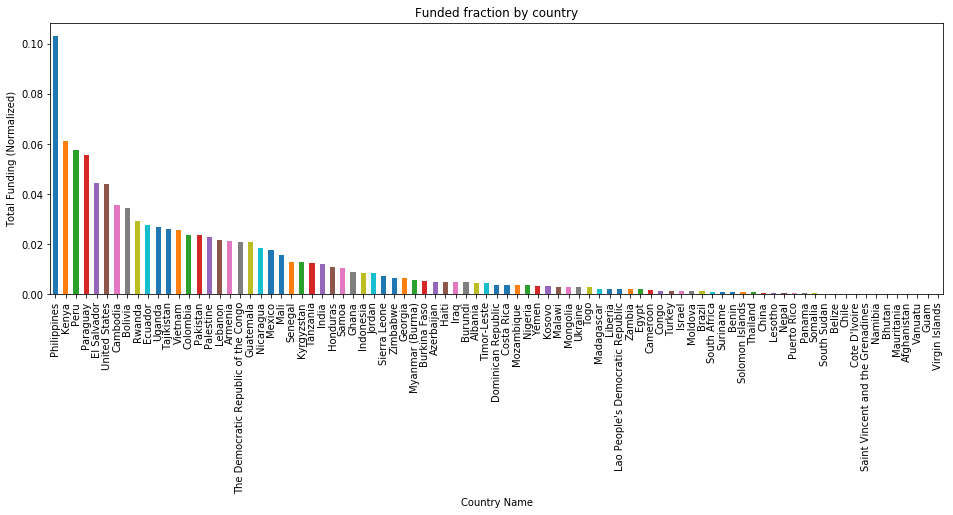

In [47]:
fig1, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,11))
plt.subplot(2,1,1)
country_funded.sort_values(ascending=False).plot.bar()
plt.title("Funded fraction by country")
plt.xlabel("Country Name")
plt.ylabel("Total Funding (Normalized)")


Text(0,0.5,'Percent of loans')

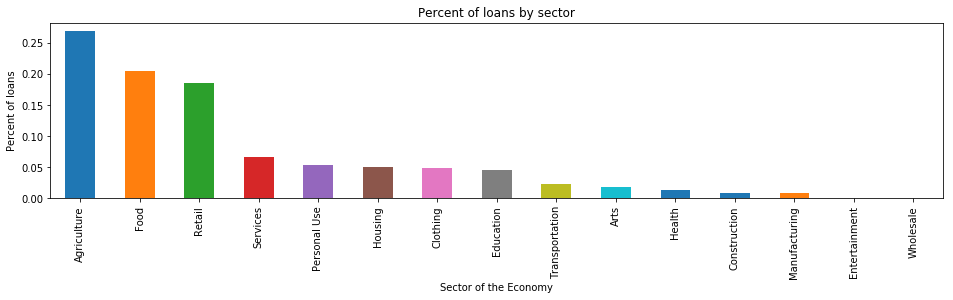

In [48]:
fig1, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,11))
plt.subplot(3,1,3)
loanSectPerc.plot.bar()
plt.title("Percent of loans by sector")
plt.xlabel("Sector of the Economy")
plt.ylabel("Percent of loans")

According to the data shown above, from the five countries receiving the largest amount of loans two are located in Asia, two in Africa and one in Latinamerica. However, they already represent  around 50% of the total number or granted loans. The country with the most loans is the Philippine with about one fourth of the available  number of loans, Kenya received around 12.5%, and the following five countries, got only about 4% of the total each, while the remaining 30% was distributed among the other 77.

On the other hand, in term of sectors: agriculture received 27%, food 20% and retail 18%, being the three main focuses of kiva,  in terms of amount of loans granted.

## Let's visualize this on a global map

In [49]:
a=pd.DataFrame(list(country_funded.index.values),columns = ["country"])
b=pd.DataFrame(list(country_funded.values),columns = ["funded_amount"])
c = pd.concat([a,b], axis=1)

In [50]:
from IPython.display import HTML
import colorlover as cl
# HTML(cl.to_html( cl.scales ))

In [53]:
import folium
print(folium.__file__)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
con_df = c
#Find out more at https://plot.ly/python/choropleth-maps/
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['funded_amount'],
        text = con_df['country'],

        colorscale = "GnBu",
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 3
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = '(Normalized) Funded Amount'),
      ) ]

layout = dict(
    title = '(normalized) amounts funded by country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='loans-world-map')



/opt/conda/lib/python3.6/site-packages/folium/__init__.py


## So far ...
we know that the country getting the largest amount of loans was the Philippine, and that these data is consistent in terms of number and amount of the granted credits




hola
hola


Kaduna                                        5948
Webuye                                        2462
Kisii                                         2406
Kitale                                        2395
San Gabriel                                   2186
Eldoret                                       1569
Teso                                          1563
San Miguel                                    1386
Usulután                                      1352
Bais, Negros Oriental                         1264
El Transito                                   1213
Matete                                        1153
Osicala                                       1092
Ciudad El Triunfo                             1089
Chwele                                        1034
Kapsowar                                       970
Gotera                                         953
Dumaguete, Negros Oriental                     891
Nkubu                                          856
Banga, Aklan                   

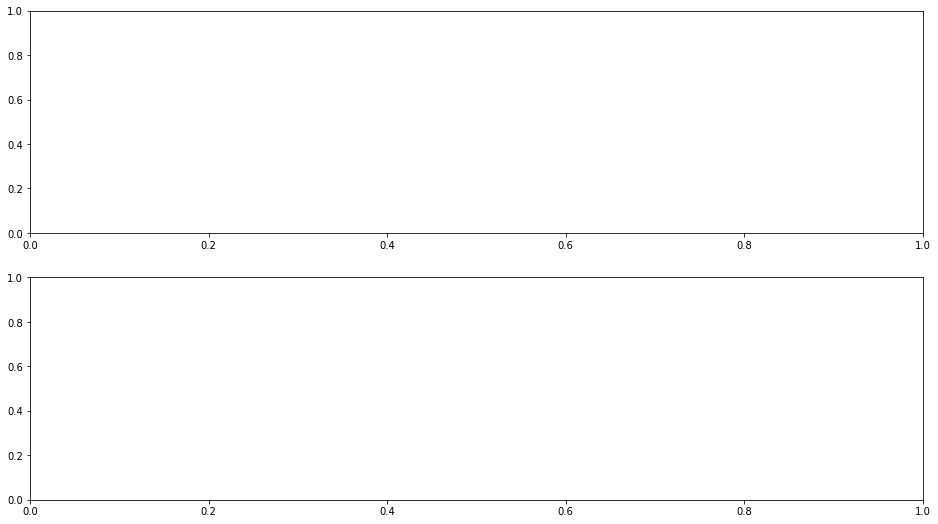

In [52]:

fctr = ["activity","region"]
Philip_agric = kiva_infoAC[kiva_infoAC["sector"] == "Agriculture"]
nPlots = len(fctr); nRows=2; nCols=int(round(nPlots/nRows))
fig3,axs = plt.subplots(nrows=nRows, ncols=nCols,figsize = (16,9))
color_vals = [-1, 0, 1]
my_norm = mpl.colors.Normalize(-1, 1)
my_cmap = mpl.cm.get_cmap('tab20c') 
for i in range(nRows):
    for j in range(nCols):
        print("hola")
#         fctr_count=
kiva_agric[fctr[i]].value_counts()
#         fctr_vals =pd.unique(kiva_agric[fctr[i]].values)
#         plt.pie(fctr_count, labels=fctr_vals,autopct='%1.1f%%', radius=0.6, colors=my_cmap(my_norm(color_vals)),startangle=90,shadow=True)

Text(0.5,1,'Agricole Activities')

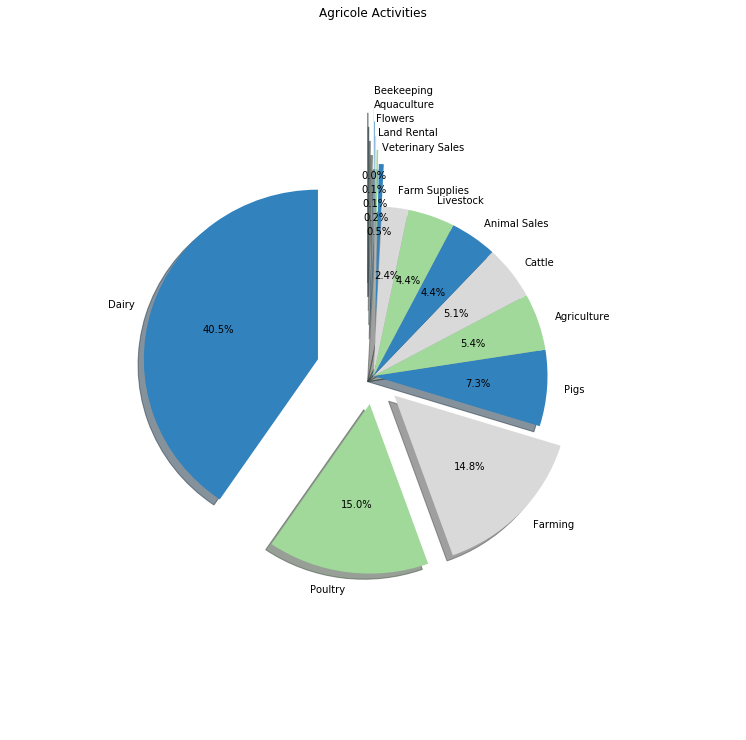

In [37]:
fig2 = plt.figure(figsize = (13,13))
color_vals = [-1, 0, 1]
my_norm = mpl.colors.Normalize(-1, 1)
my_cmap = mpl.cm.get_cmap('tab20c') 
explode = (0.2, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0.15, 0.2, 0.25, 0.3, 0.35)
plt.pie(agric_count, labels=agric_vals,autopct='%1.1f%%', radius=0.6, colors=my_cmap(my_norm(color_vals)),explode=explode, startangle=90,shadow=True)
plt.title("Agricole Activities")

Agriculture is the sector with the largest number of loans, and from this sector diary, poultry and farming respectively are the subsectors with more investments. Let's now check what regions have been granted with the money.

In [38]:
import seaborn as sbn
# sbn.barplot(x="funded_amount", y="region", data=kiva_infoA)
countries_count = kiva_infoA.country.value_counts()
countries = pd.unique(kiva_infoA.country)


## Partial results and remarks:
By only focusing on the data provided by Kiva, it is necessary to rethink the distribution of budget, not only based on contries and sectors, but also by thinking of the global wellfare of the population. Distributing 70% of the budget between only five countries including the most powerful country in the world, shows that loans conditions need to change. Elements that must be further examined include the intended type of investments, and the enviromental, social, and educational contexts. In general, agriculture is above all others options a critical sector, already consider essential by Kiva, but instead of looking at covering marginal need of the incumbents, it is also necessary to analyze the return of the loan in terms of how funding those projects affect the environment in the long run; which makes necessary stimulate  the funding of green projects, combined with new technologies, which are also connected to the productive and sustainible development of the targeted areas. To analyze those factors, and how to fund those alternatives, the next aspect to study  will be related to the Multidimensional Poverty Index table, and aspects related to the access to technology.  TU BE CONTINUED...